<a href="https://colab.research.google.com/github/Aleeshbah11/Data-Cleaning/blob/main/EDA_(Titanic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step-by-Step Exploratory Data Analysis (EDA) on Titanic Dataset

## Load and Inspect Data
First, load the dataset and inspect its structure.

In [1]:
import pandas as pd

# Load Titanic dataset from seaborn
import seaborn as sns
df = sns.load_dataset("titanic")

# Display first 5 rows
print(df.head())

# Check data types and missing values
print(df.info())

# Summary statistics (only numerical features)
print(df.describe())

# Count missing values
print(df.isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

Observations:
- Some columns like age, deck, and embark_town have missing values.
- Categorical columns need encoding.
- Survived column is our target variable (1 = survived, 0 = not survived).

## Univariate Analysis (Distribution of Each Feature)
Analyze each feature separately using histograms, count plots, and box plots.

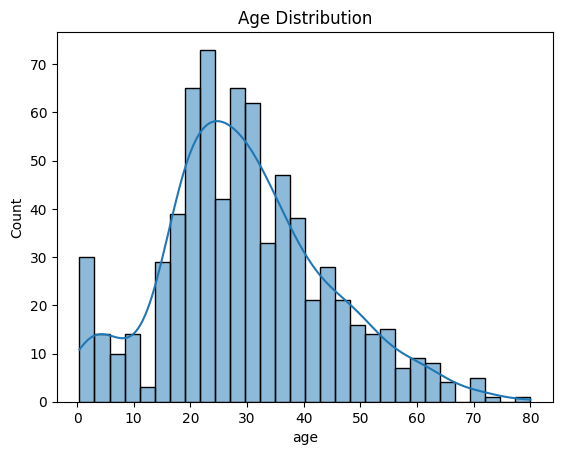

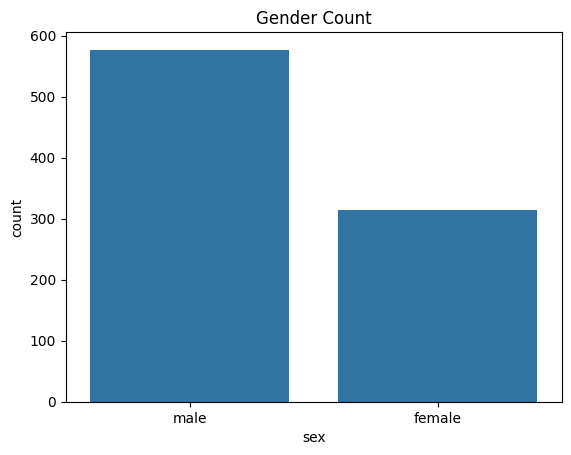

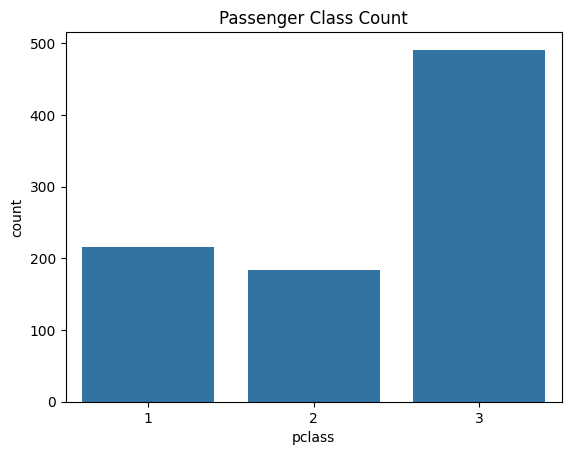

In [2]:
import matplotlib.pyplot as plt

# Distribution of Age
sns.histplot(df["age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Countplot for categorical variables
sns.countplot(x="sex", data=df)
plt.title("Gender Count")
plt.show()

sns.countplot(x="pclass", data=df)
plt.title("Passenger Class Count")
plt.show()


Observations:
- Most passengers are between 20-40 years old.
- More males than females.
- Most passengers belong to 3rd class.

## Outlier Detection (Using Boxplots & IQR)
Detect and handle outliers in the age and fare columns.

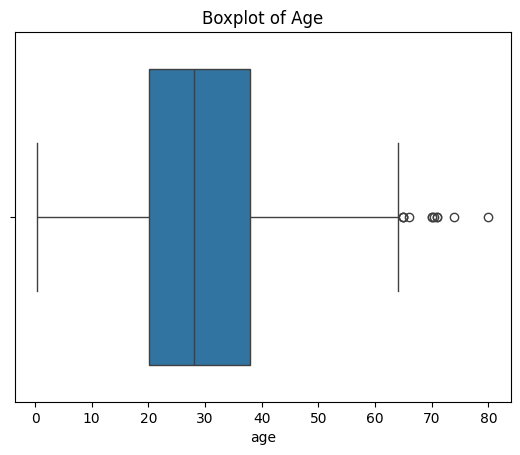

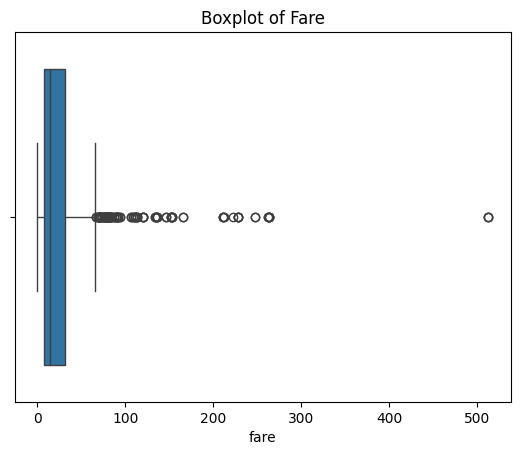

In [3]:
# Boxplot for age
sns.boxplot(x=df["age"])
plt.title("Boxplot of Age")
plt.show()

# Boxplot for fare
sns.boxplot(x=df["fare"])
plt.title("Boxplot of Fare")
plt.show()

# Remove outliers using IQR method
Q1 = df["fare"].quantile(0.25)
Q3 = df["fare"].quantile(0.75)
IQR = Q3 - Q1
df = df[(df["fare"] >= (Q1 - 1.5 * IQR)) & (df["fare"] <= (Q3 + 1.5 * IQR))]


Observations:
- Fare has extreme outliers, which we remove using the IQR method.



## Handling Missing Data
Missing data should be filled or dropped.

In [4]:
# Check missing values
print(df.isnull().sum())

# Fill missing age values with median
df["age"].fillna(df["age"].median(), inplace=True)

# Fill missing embark_town with the most common value (mode)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

# Drop 'deck' column (too many missing values)
df.drop(columns=["deck"], inplace=True)


survived         0
pclass           0
sex              0
age            162
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           662
embark_town      0
alive            0
alone            0
dtype: int64


<ipython-input-4-97225d5ac1b0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
<ipython-input-4-97225d5ac1b0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Observations:
- Filled missing 'age' with median.
- Filled missing 'embark_town' with mode.
- Dropped 'deck' because it had too many missing values.

## Bivariate Analysis (Feature Relationships)
Analyze how features affect survival.

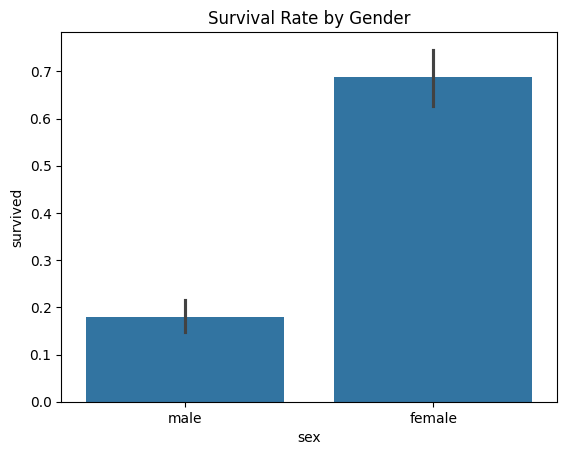

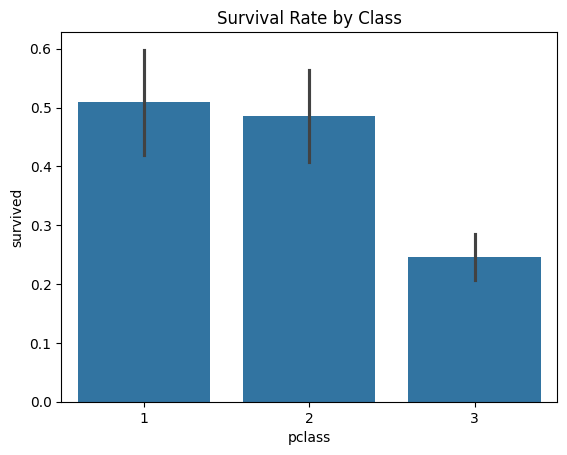

In [5]:
# Survival rate by gender
sns.barplot(x="sex", y="survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by passenger class
sns.barplot(x="pclass", y="survived", data=df)
plt.title("Survival Rate by Class")
plt.show()


Observations:
- Females survived more than males.
- 1st class passengers had higher survival rates.

## Correlation Matrix
Check feature correlations.

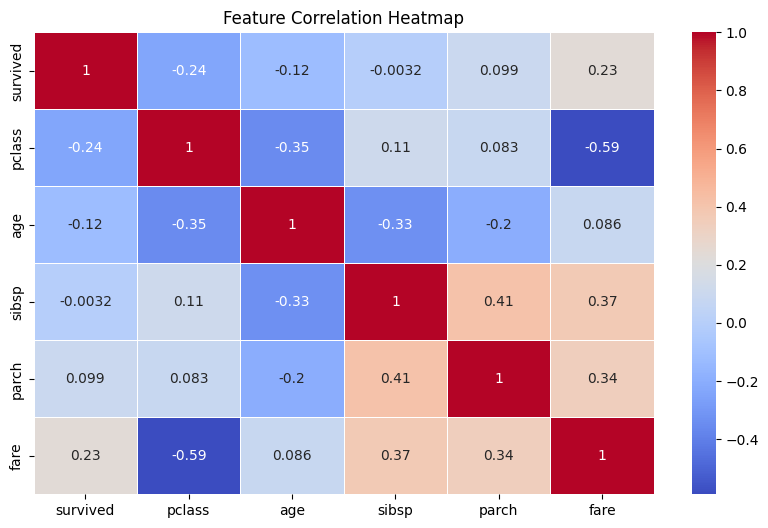

In [7]:
import numpy as np
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm", linewidths=0.5) # Select only numerical features for correlation
plt.title("Feature Correlation Heatmap")
plt.show()


Observations:
- Fare is correlated with survival (higher fares = better survival).
- Pclass (passenger class) is negatively correlated with survival (lower-class passengers had lower survival rates).

##Feature Engineering
Create new features:

- Family Size (sum of siblings/spouses & parents/children).
- Title Extraction from names.

In [8]:
# Family Size
df["family_size"] = df["sibsp"] + df["parch"] + 1  # Include self

# Extract titles from names
df["title"] = df["who"].map({"man": "Mr", "woman": "Mrs", "child": "Master"})

# Drop unnecessary columns
df.drop(columns=["who", "alive"], inplace=True)

print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   
5         0       3    male  28.0      0      0   8.4583        Q  Third   

   adult_male  embark_town  alone  family_size title  
0        True  Southampton  False            2    Mr  
2       False  Southampton   True            1   Mrs  
3       False  Southampton  False            2   Mrs  
4        True  Southampton   True            1    Mr  
5        True   Queenstown   True            1    Mr  


Observations:
- Created a 'family_size' feature (small families had better survival).
- Extracted passenger titles ('Mr', 'Mrs', 'Master').

##  Encoding Categorical Features
Convert categorical variables into numerical format.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Label encode 'sex' column
df["sex"] = LabelEncoder().fit_transform(df["sex"])

# One-hot encode 'embark_town'
df = pd.get_dummies(df, columns=["embark_town", "title"], drop_first=True)

print(df.head())


   survived  pclass  sex   age  sibsp  parch     fare embarked  class  \
0         0       3    1  22.0      1      0   7.2500        S  Third   
2         1       3    0  26.0      0      0   7.9250        S  Third   
3         1       1    0  35.0      1      0  53.1000        S  First   
4         0       3    1  35.0      0      0   8.0500        S  Third   
5         0       3    1  28.0      0      0   8.4583        Q  Third   

   adult_male  alone  family_size  embark_town_Queenstown  \
0        True  False            2                   False   
2       False   True            1                   False   
3       False  False            2                   False   
4        True   True            1                   False   
5        True   True            1                    True   

   embark_town_Southampton  title_Mr  title_Mrs  
0                     True      True      False  
2                     True     False       True  
3                     True     False       T

Observations:
- Converted 'sex' into binary (0 for male, 1 for female).
- One-hot encoded embark_town & title

## Feature Scaling
Normalize numerical features.

In [10]:
from sklearn.preprocessing import StandardScaler

# Standardize fare & age
scaler = StandardScaler()
df[["age", "fare"]] = scaler.fit_transform(df[["age", "fare"]])

print(df.head())


   survived  pclass  sex       age  sibsp  parch      fare embarked  class  \
0         0       3    1 -0.528321      1      0 -0.779117        S  Third   
2         1       3    0 -0.215182      0      0 -0.729373        S  Third   
3         1       1    0  0.489381      1      0  2.599828        S  First   
4         0       3    1  0.489381      0      0 -0.720161        S  Third   
5         0       3    1 -0.058613      0      0 -0.690071        Q  Third   

   adult_male  alone  family_size  embark_town_Queenstown  \
0        True  False            2                   False   
2       False   True            1                   False   
3       False  False            2                   False   
4        True   True            1                   False   
5        True   True            1                    True   

   embark_town_Southampton  title_Mr  title_Mrs  
0                     True      True      False  
2                     True     False       True  
3             

Observations:
- Scaled numerical features for better model performance.

### Final Cleaned Dataset

In [11]:
print(df.head())  # Check final dataset
print(df.info())  # Check data types & null values


   survived  pclass  sex       age  sibsp  parch      fare embarked  class  \
0         0       3    1 -0.528321      1      0 -0.779117        S  Third   
2         1       3    0 -0.215182      0      0 -0.729373        S  Third   
3         1       1    0  0.489381      1      0  2.599828        S  First   
4         0       3    1  0.489381      0      0 -0.720161        S  Third   
5         0       3    1 -0.058613      0      0 -0.690071        Q  Third   

   adult_male  alone  family_size  embark_town_Queenstown  \
0        True  False            2                   False   
2       False   True            1                   False   
3       False  False            2                   False   
4        True   True            1                   False   
5        True   True            1                    True   

   embark_town_Southampton  title_Mr  title_Mrs  
0                     True      True      False  
2                     True     False       True  
3             

# Classification model

Predict survival (survived) using machine learning.
(Logistic Regression & Random Forest)

In [12]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = sns.load_dataset("titanic")

# Fill missing values
df["age"].fillna(df["age"].median(), inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)
df.drop(columns=["deck"], inplace=True)

# Feature engineering
df["family_size"] = df["sibsp"] + df["parch"] + 1
df["title"] = df["who"].map({"man": "Mr", "woman": "Mrs", "child": "Master"})

# Encode categorical variables
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df = pd.get_dummies(df, columns=["embark_town", "title"], drop_first=True)

# Select features & target
X = df.drop(columns=["survived", "who", "alive", "class", "embarked", "adult_male", "alone"])
y = df["survived"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[["age", "fare"]] = scaler.fit_transform(X_train[["age", "fare"]])
X_test[["age", "fare"]] = scaler.transform(X_test[["age", "fare"]])

print(X_train.head())


     pclass  sex       age  sibsp  parch      fare  family_size  \
331       1    1  1.253641      0      0 -0.078684            1   
733       2    1 -0.477284      0      0 -0.377145            1   
382       3    1  0.215086      0      0 -0.474867            1   
704       3    1 -0.246494      1      0 -0.476230            2   
813       3    0 -1.785093      4      2 -0.025249            7   

     embark_town_Queenstown  embark_town_Southampton  title_Mr  title_Mrs  
331                   False                     True      True      False  
733                   False                     True      True      False  
382                   False                     True      True      False  
704                   False                     True      True      False  
813                   False                     True     False      False  


<ipython-input-12-c120daa5856b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
<ipython-input-12-c120daa5856b>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

## Train Logistic Model

In [13]:
from sklearn.linear_model import LogisticRegression

# Train model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## Train Random Forest Model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       105
           1       0.79      0.78      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Confusion Matrix

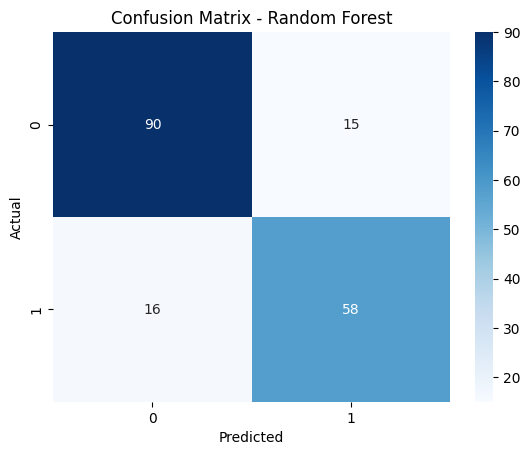

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## XGBoost

In [16]:
# Install XGBoost if not installed
# !pip install xgboost

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb


### Preprocess data

In [17]:
# Load dataset
df = sns.load_dataset("titanic")

# Fill missing values
df["age"].fillna(df["age"].median(), inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)
df.drop(columns=["deck"], inplace=True)

# Feature engineering
df["family_size"] = df["sibsp"] + df["parch"] + 1
df["title"] = df["who"].map({"man": "Mr", "woman": "Mrs", "child": "Master"})

# Encode categorical variables
df["sex"] = LabelEncoder().fit_transform(df["sex"])
df = pd.get_dummies(df, columns=["embark_town", "title"], drop_first=True)

# Select features & target
X = df.drop(columns=["survived", "who", "alive", "class", "embarked", "adult_male", "alone"])
y = df["survived"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[["age", "fare"]] = scaler.fit_transform(X_train[["age", "fare"]])
X_test[["age", "fare"]] = scaler.transform(X_test[["age", "fare"]])

print(X_train.head())


     pclass  sex       age  sibsp  parch      fare  family_size  \
331       1    1  1.253641      0      0 -0.078684            1   
733       2    1 -0.477284      0      0 -0.377145            1   
382       3    1  0.215086      0      0 -0.474867            1   
704       3    1 -0.246494      1      0 -0.476230            2   
813       3    0 -1.785093      4      2 -0.025249            7   

     embark_town_Queenstown  embark_town_Southampton  title_Mr  title_Mrs  
331                   False                     True      True      False  
733                   False                     True      True      False  
382                   False                     True      True      False  
704                   False                     True      True      False  
813                   False                     True     False      False  


<ipython-input-17-4b2d2ed97696>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median(), inplace=True)
<ipython-input-17-4b2d2ed97696>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

### Train XGBoost Model

In [18]:
# Train XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       105
           1       0.75      0.74      0.75        74

    accuracy                           0.79       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.79      0.79      0.79       179



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:28:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## Feature Selection

###SHAP (SHapley Additive exPlanations):
 Explains model predictions.ShaP

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:29:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


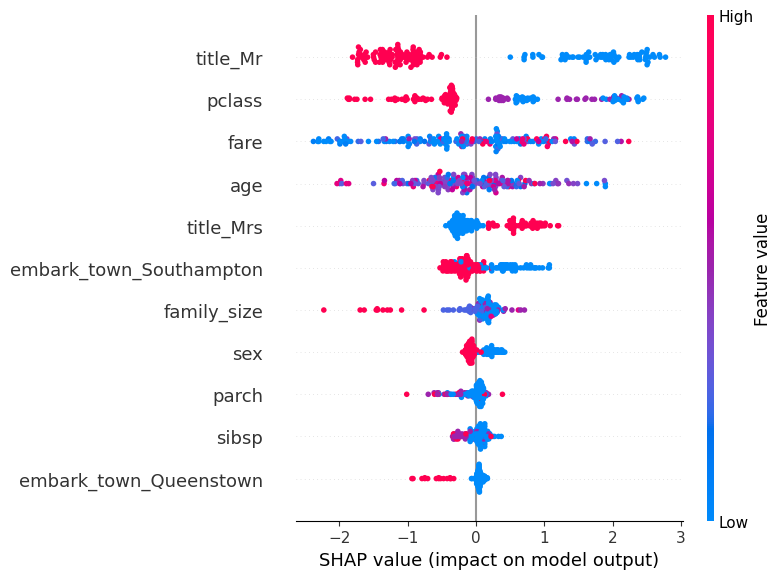

In [19]:
import shap

# Train XGBoost model
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
xgb_clf.fit(X_train, y_train)

# Explain model predictions
explainer = shap.Explainer(xgb_clf)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)


## Mutual Information for Feature Selection

 Higher MI scores indicate stronger feature relevance.

In [20]:
from sklearn.feature_selection import mutual_info_classif

# Compute mutual information scores
mi_scores = mutual_info_classif(X_train, y_train)

# Convert to DataFrame
mi_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)

print(mi_df)


                    Feature  MI Score
9                  title_Mr  0.167776
10                title_Mrs  0.122959
1                       sex  0.118850
5                      fare  0.097391
8   embark_town_Southampton  0.060366
0                    pclass  0.057090
4                     parch  0.052130
2                       age  0.035778
3                     sibsp  0.035350
6               family_size  0.012716
7    embark_town_Queenstown  0.000000


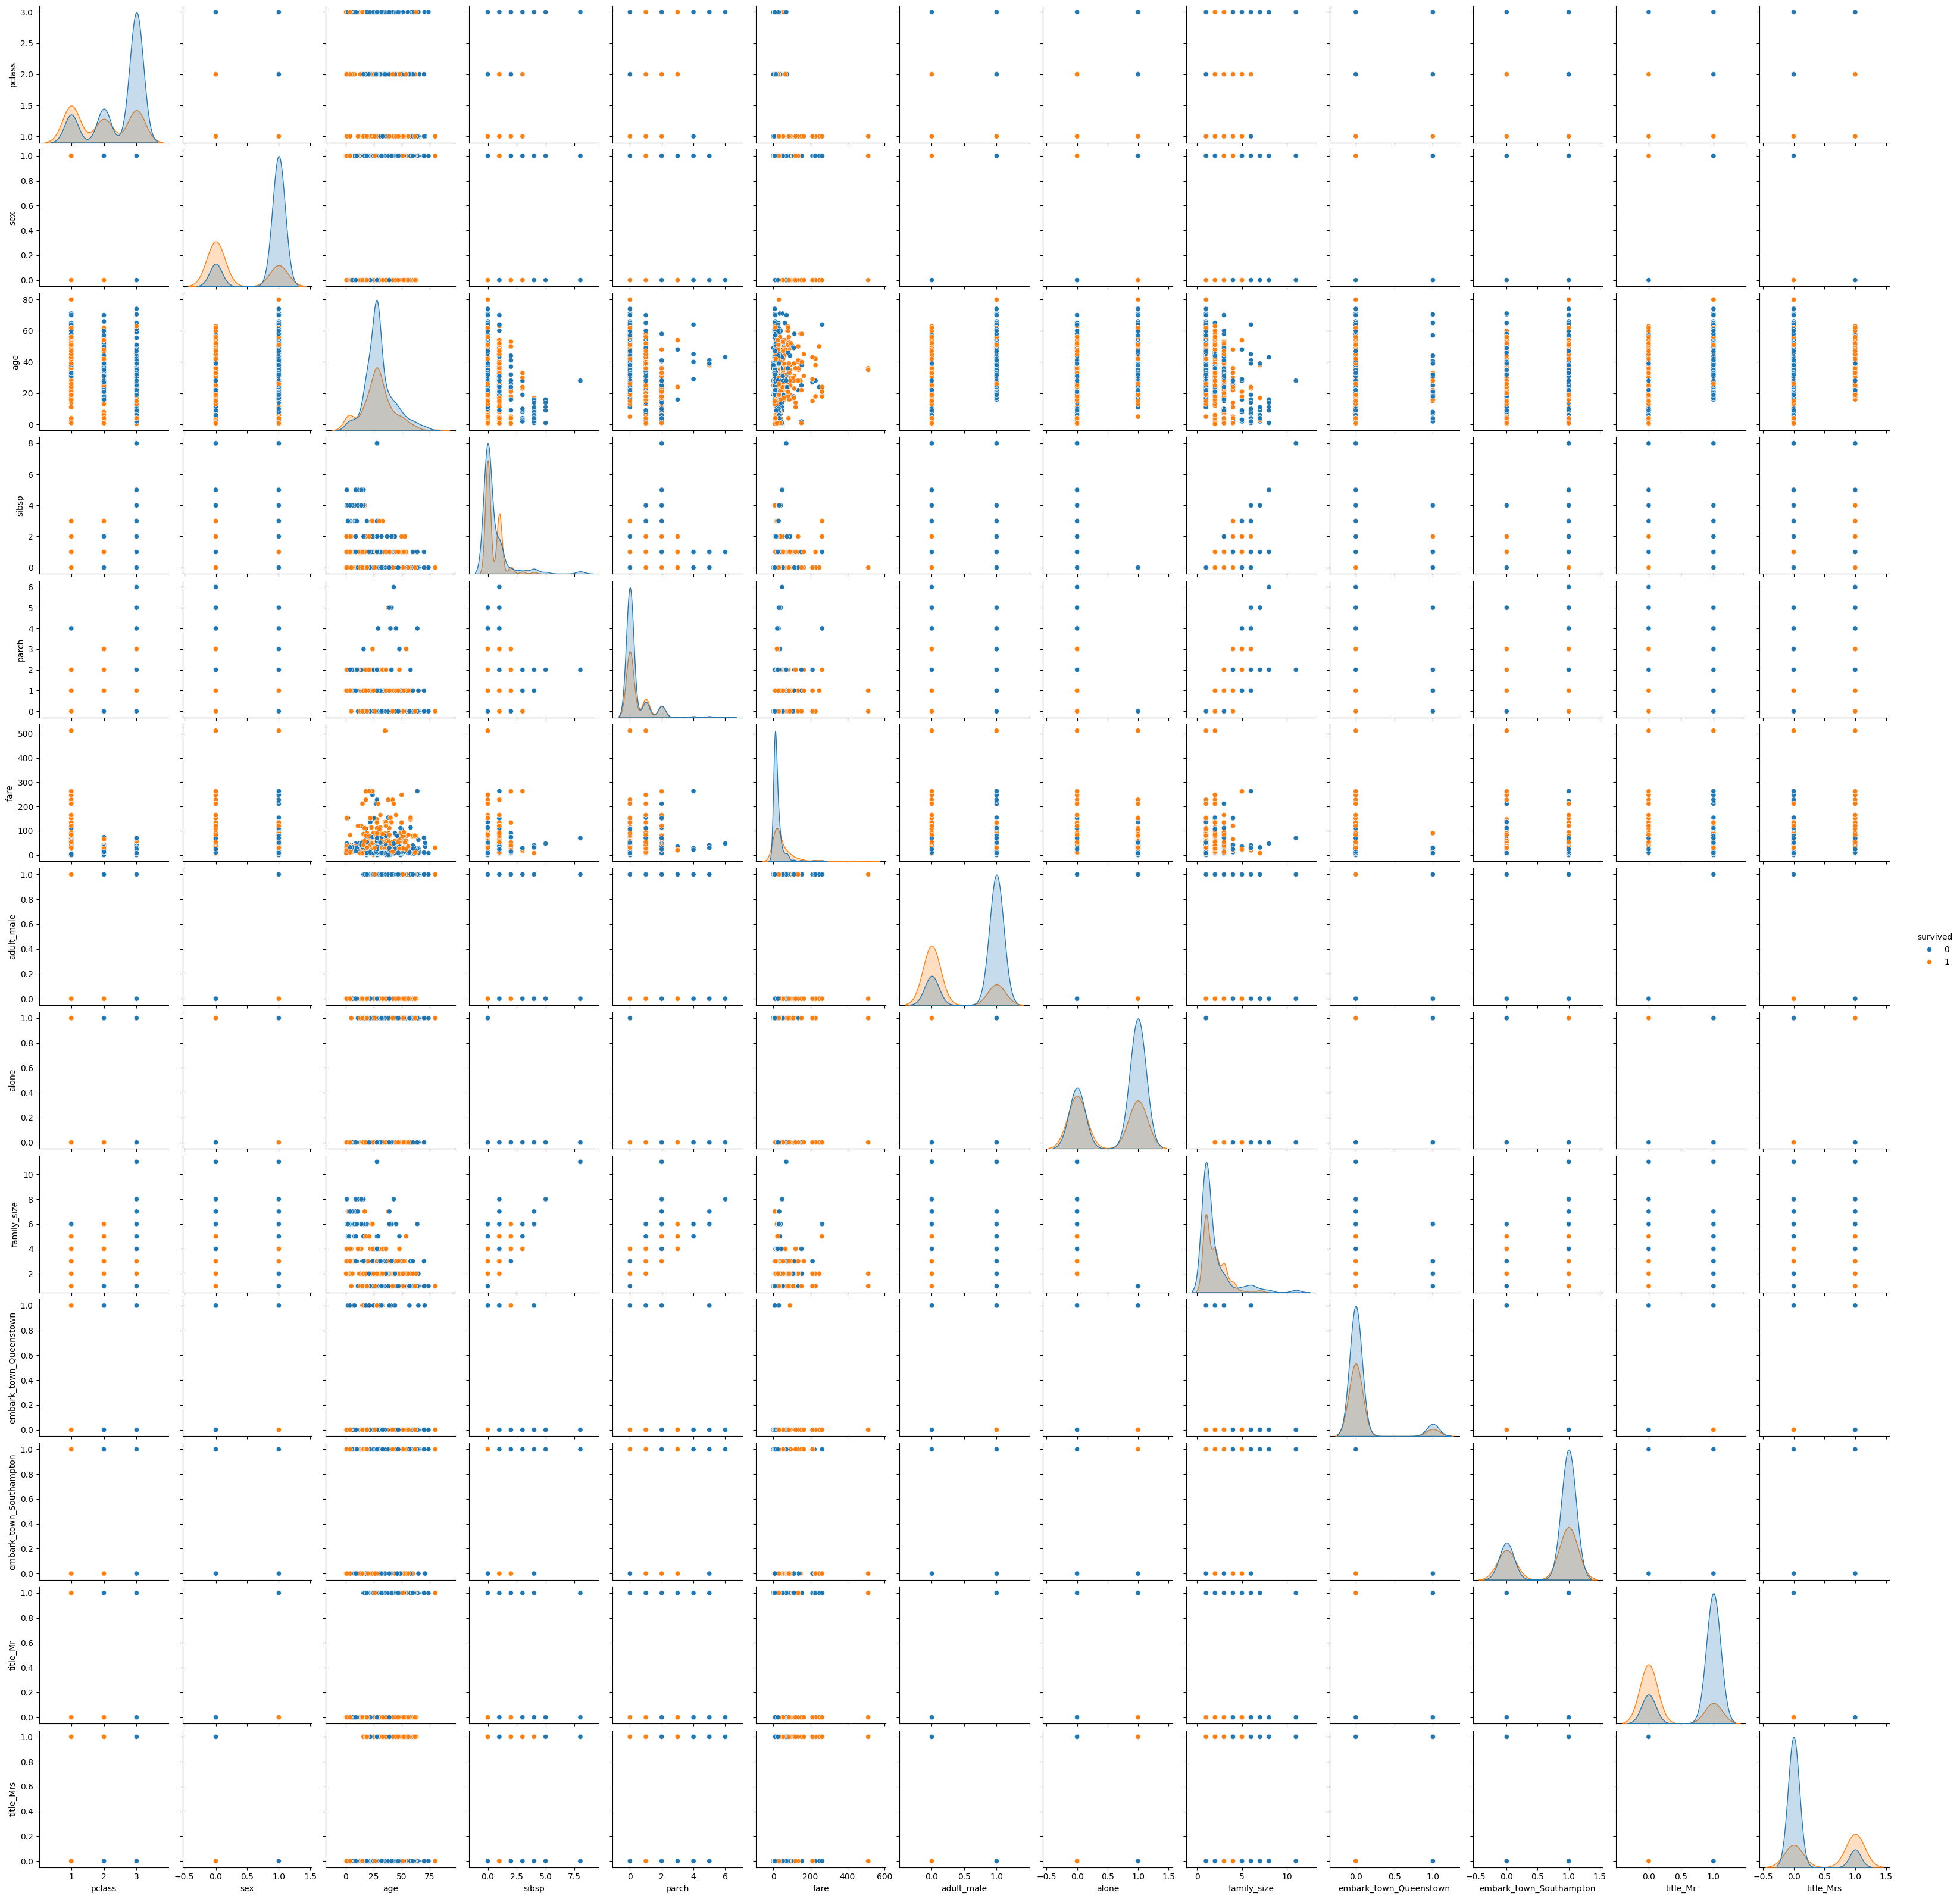

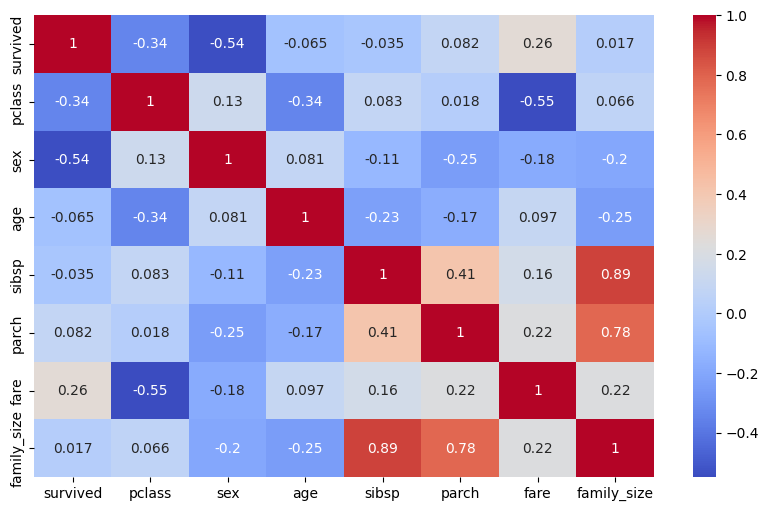

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])

# Pairplot for feature relationships, using 'survived' for hue as 'target' is not present
sns.pairplot(df, hue="survived") # Changed hue to 'survived'

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [24]:
import plotly.express as px

# Replace 'feature1', 'feature2', and 'target' with actual column names from your DataFrame
fig = px.scatter(df, x="age", y="fare", color="survived")
fig.show()

 # Feature Distributions & Outliers

## Boxplot to detect outliers

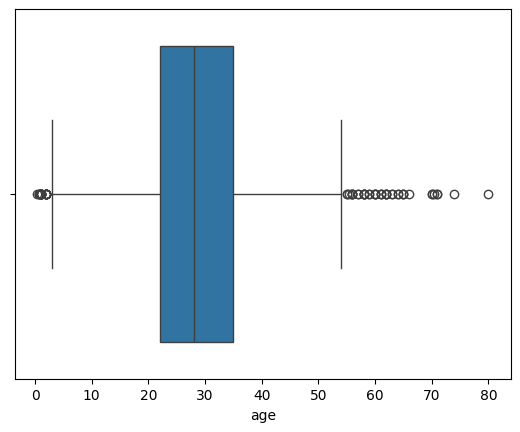

In [26]:
# Replace 'feature1' with an actual column name from your DataFrame, e.g., 'age'
sns.boxplot(x=df["age"])
plt.show()

## Histogram for distribution

<Axes: >

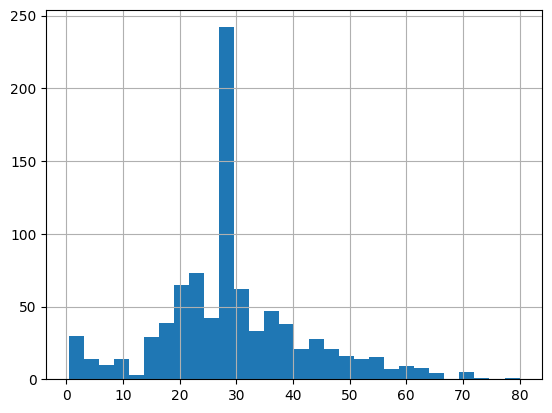

In [27]:
df["age"].hist(bins=30)

## Z-score or IQR for outlier detection

In [30]:
from scipy import stats

# Z-score method
z_scores = stats.zscore(df["age"])
outliers = df[(z_scores > 3) | (z_scores < -3)]
print(outliers)

     survived  pclass  sex   age  sibsp  parch     fare embarked   class  who  \
96          0       1    1  71.0      0      0  34.6542        C   First  man   
116         0       3    1  70.5      0      0   7.7500        Q   Third  man   
493         0       1    1  71.0      0      0  49.5042        C   First  man   
630         1       1    1  80.0      0      0  30.0000        S   First  man   
672         0       2    1  70.0      0      0  10.5000        S  Second  man   
745         0       1    1  70.0      1      1  71.0000        S   First  man   
851         0       3    1  74.0      0      0   7.7750        S   Third  man   

     adult_male alive  alone  family_size  embark_town_Queenstown  \
96         True    no   True            1                   False   
116        True    no   True            1                    True   
493        True    no   True            1                   False   
630        True   yes   True            1                   False   
672   

## Feature Relationships & Dependencies

In [32]:
from scipy.stats import chi2_contingency

# Replace 'sex' with your desired categorical feature column name
# Replace 'survived' with your desired target column name
contingency_table = pd.crosstab(df["sex"], df["survived"])
chi2, p, _, _ = chi2_contingency(contingency_table)

print("Chi-Square Test p-value:", p)

Chi-Square Test p-value: 1.1973570627755645e-58


## Mutual Information for feature importance

In [40]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Assuming 'survived' is your target variable
# Drop rows with any missing values in the features or target
df_cleaned = df.dropna(subset=[col for col in df.columns if col != 'survived'] + ['survived'])

# Select only numerical features for mutual information calculation
numerical_features = df_cleaned.select_dtypes(include=['number']).drop(columns=["survived"])

# Calculate mutual information scores using the cleaned DataFrame and numerical features
mi = mutual_info_classif(numerical_features, df_cleaned["survived"])

# Create a DataFrame to display the results
mi_df = pd.DataFrame({"Feature": numerical_features.columns, "Mutual Info": mi}).sort_values(by="Mutual Info", ascending=False)

print(mi_df)

       Feature  Mutual Info
1          sex     0.142252
5         fare     0.132824
6  family_size     0.072898
0       pclass     0.057864
2          age     0.036453
4        parch     0.024762
3        sibsp     0.000000


# Hypothesis Testing

if observed differences in data are statistically significant

### T-test for comparing two groups

In [42]:
from scipy.stats import ttest_ind

# Replace 'category' and 'feature' with actual column names from your DataFrame
# For example, if you want to compare the 'age' of passengers in different 'pclass' (passenger class):
group1 = df[df["pclass"] == 1]["age"]  # Passengers in class 1
group2 = df[df["pclass"] == 3]["age"]  # Passengers in class 3

t_stat, p_value = ttest_ind(group1, group2)
print("T-test p-value:", p_value)

T-test p-value: 5.067529547258856e-27


### ANOVA for comparing multiple groups

In [45]:
from scipy.stats import f_oneway

# Replace 'category' and 'feature' with actual column names from your DataFrame
# For example, to compare 'age' across different 'pclass' (passenger class):
f_stat, p_value = f_oneway(df[df["pclass"] == 1]["age"],  # Passengers in class 1 - 'age'
                           df[df["pclass"] == 2]["age"],  # Passengers in class 2 - 'age'
                           df[df["pclass"] == 3]["age"]) # Passengers in class 3 - 'age'
print("ANOVA p-value:", p_value)

ANOVA p-value: 6.3223704081961045e-25


### plots

<Figure size 1200x600 with 0 Axes>

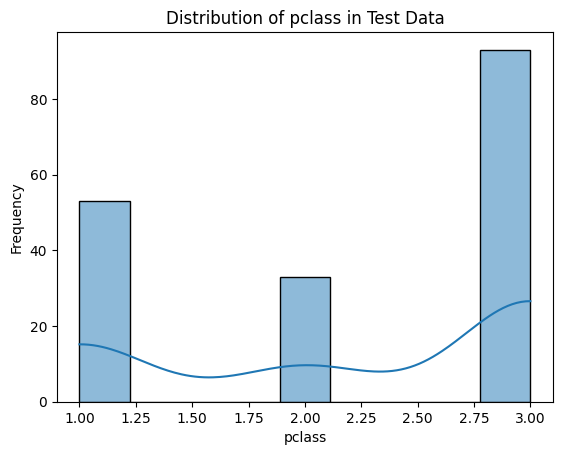

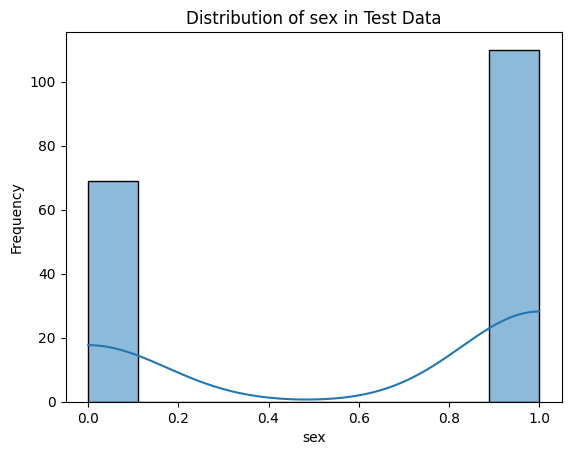

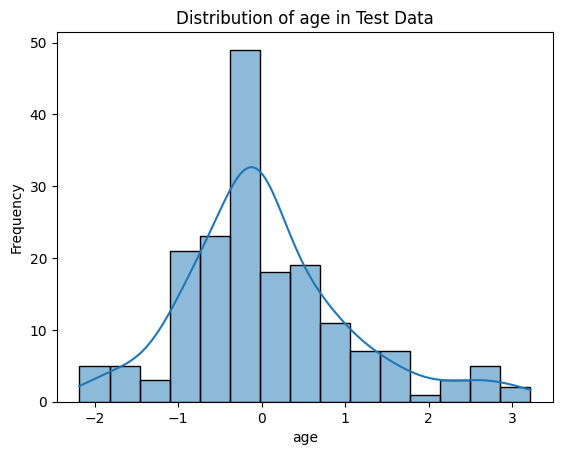

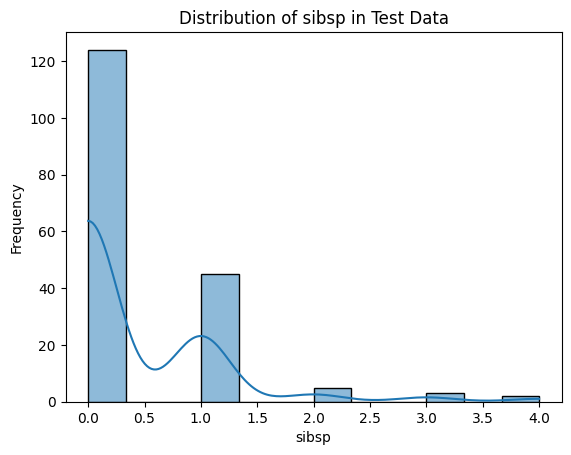

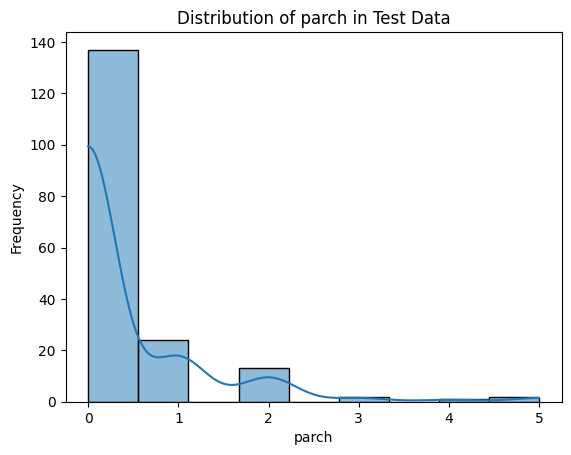

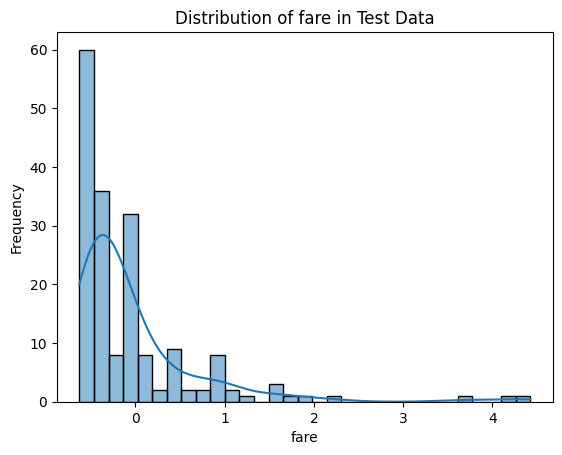

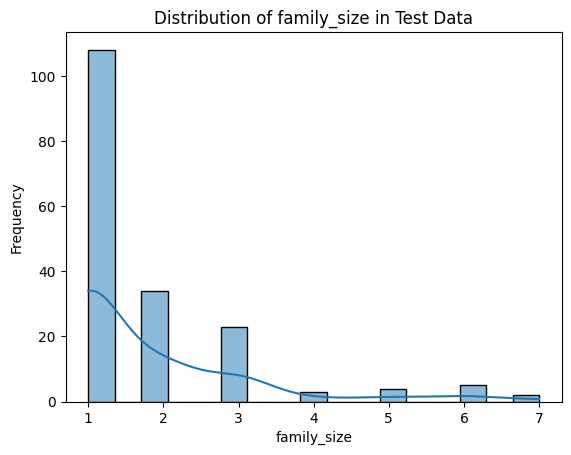

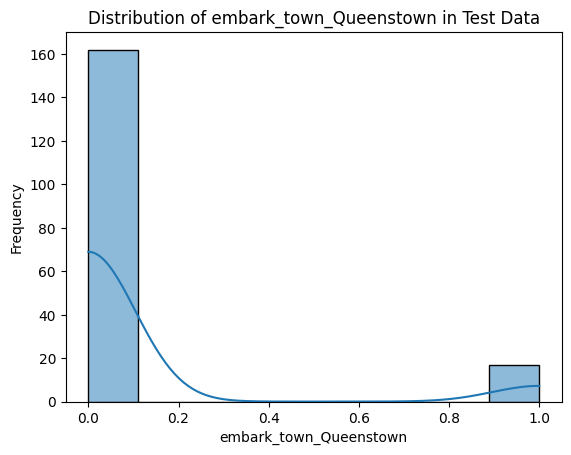

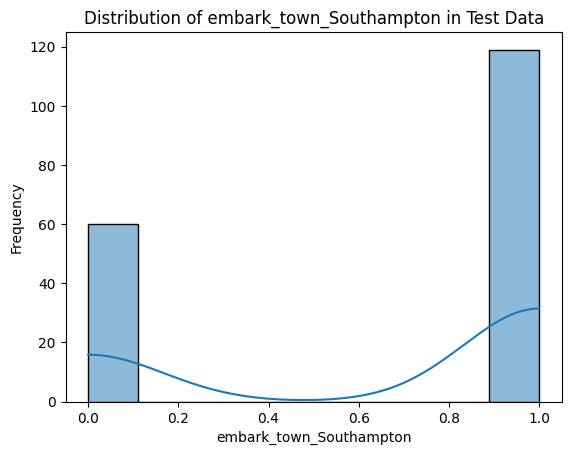

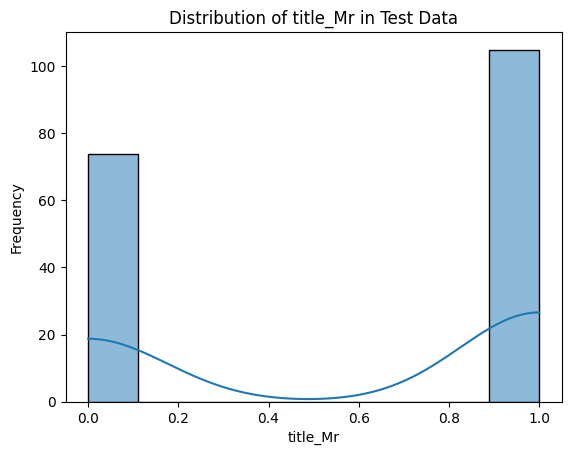

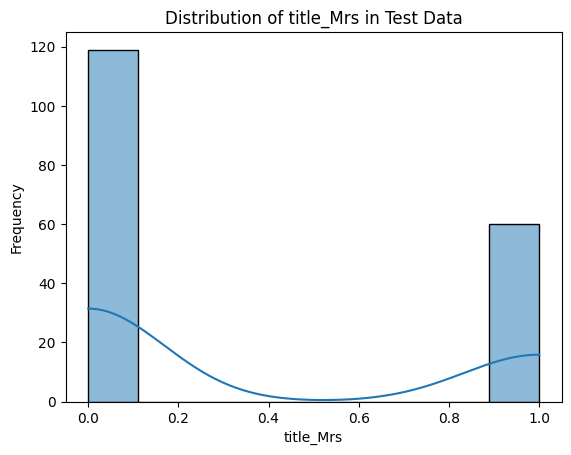

In [46]:
# prompt: write a code to plot all the testing values distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test is your testing data
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
for col in X_test.columns:
    plt.figure()  # Create a new figure for each column
    sns.histplot(X_test[col], kde=True)
    plt.title(f'Distribution of {col} in Test Data')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.show()


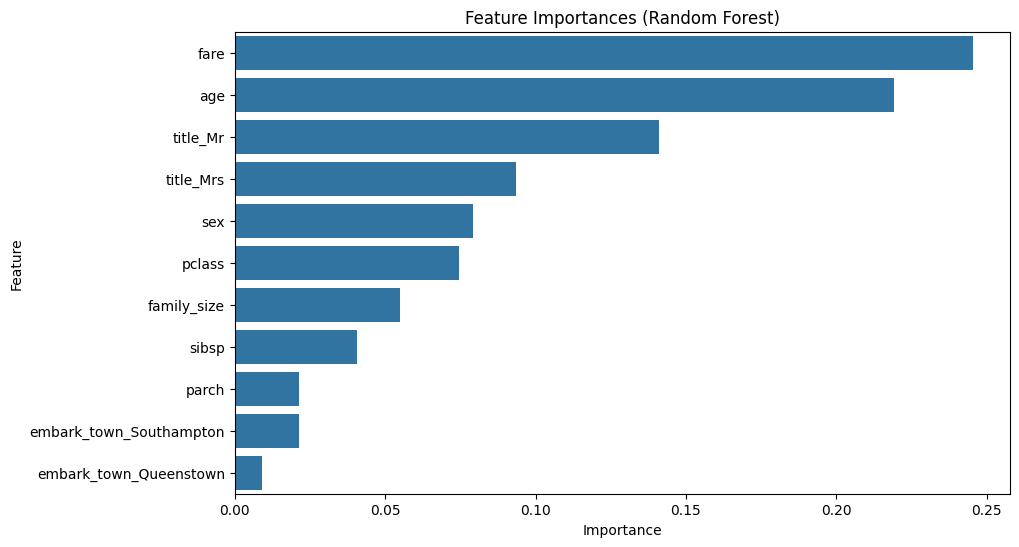

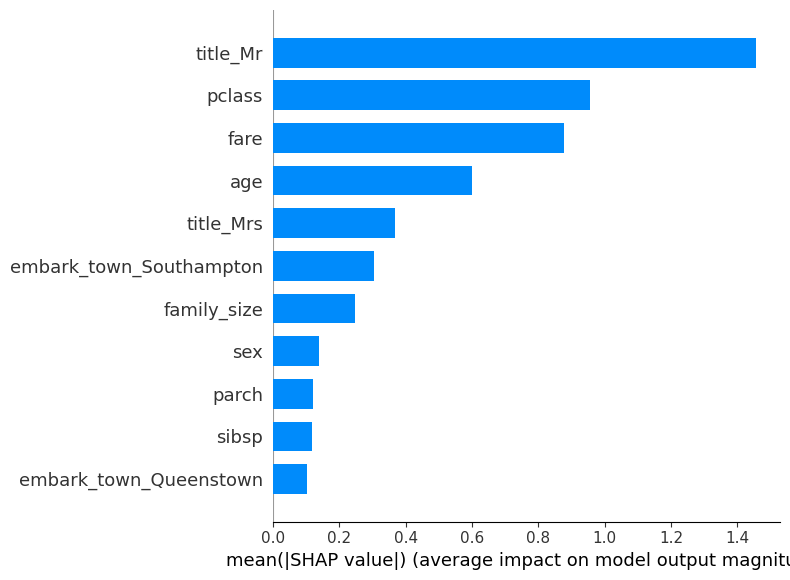

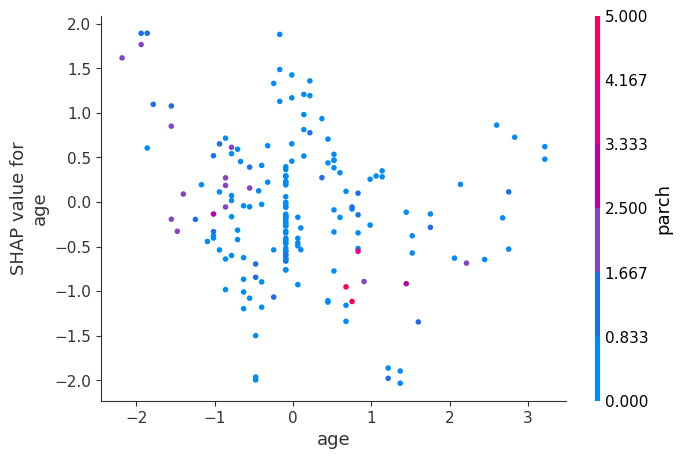

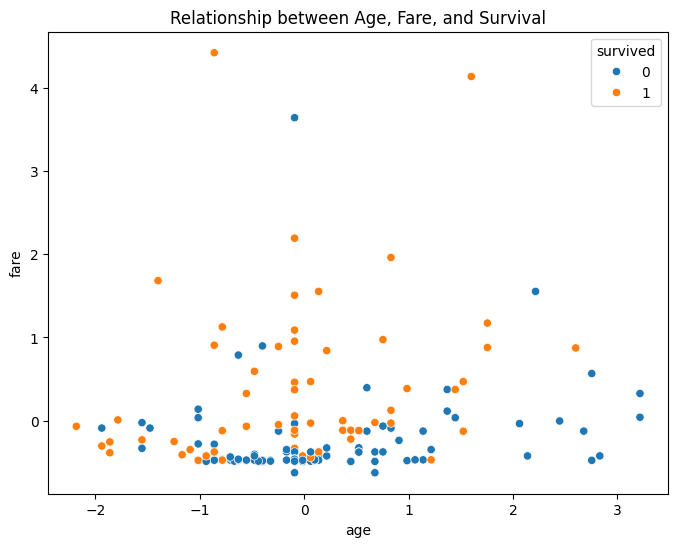

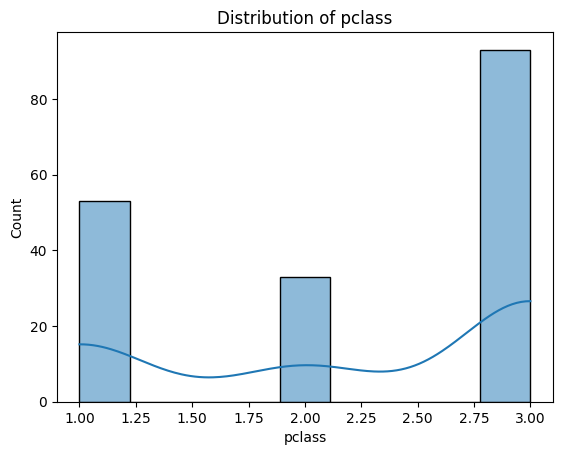

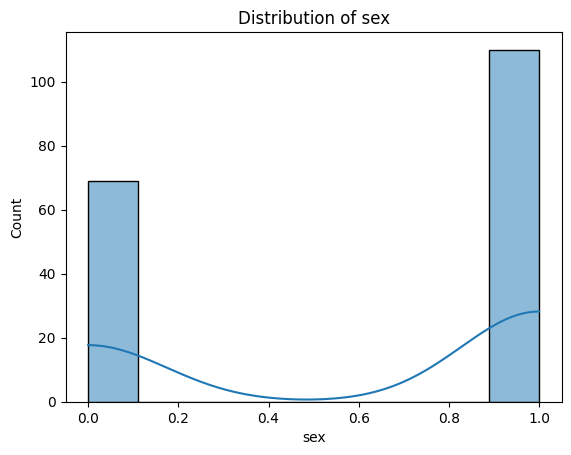

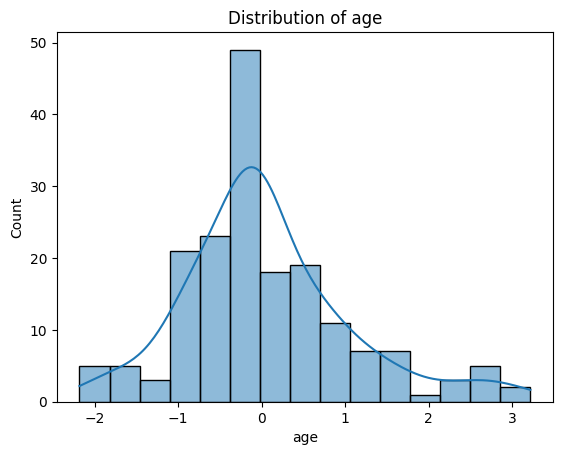

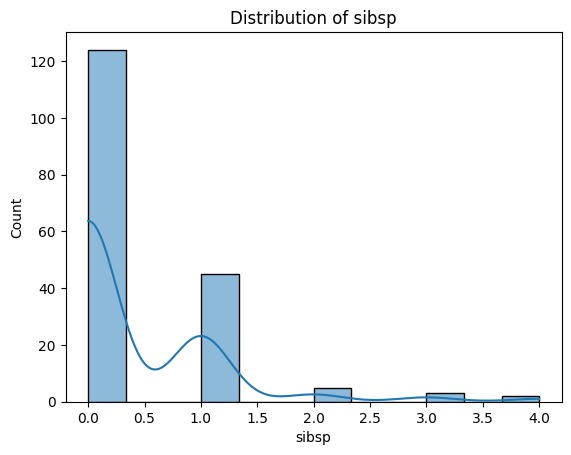

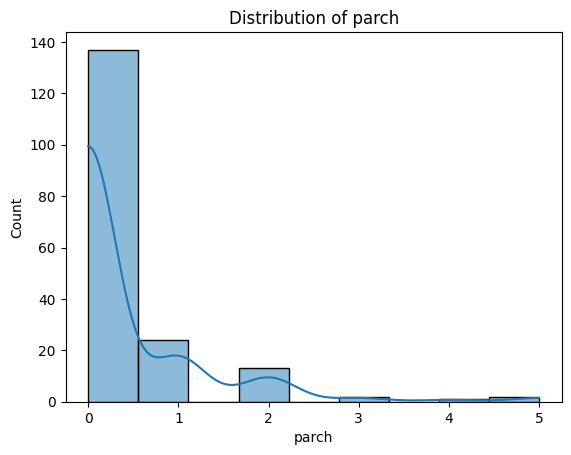

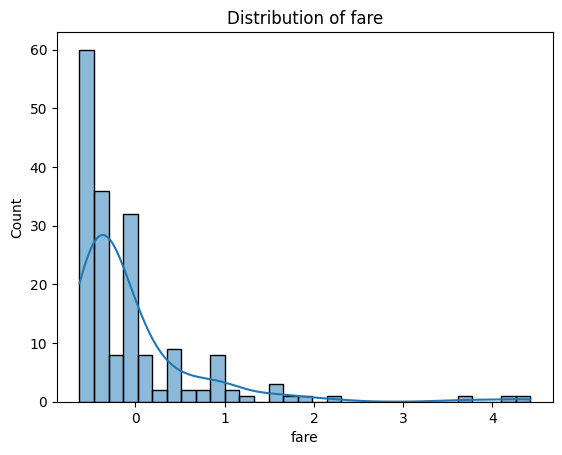

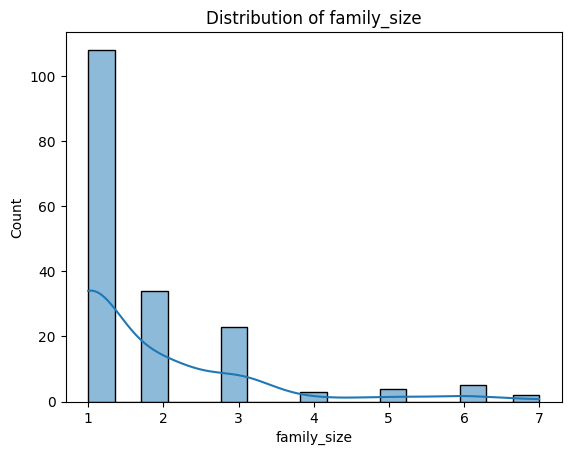

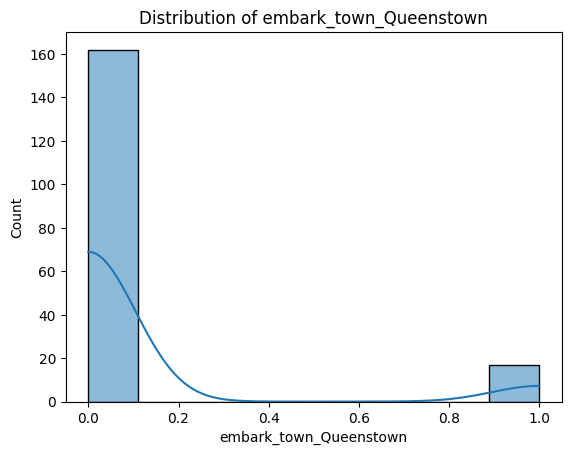

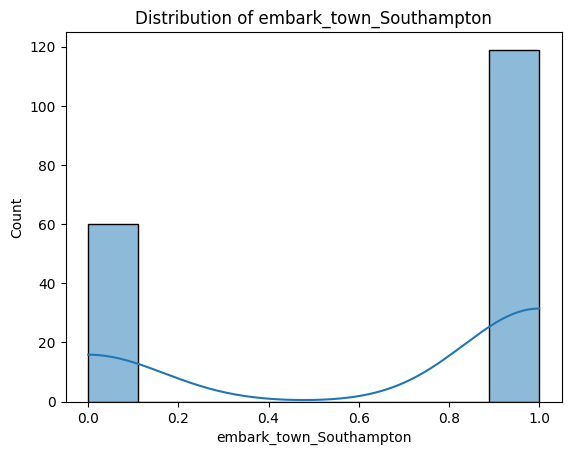

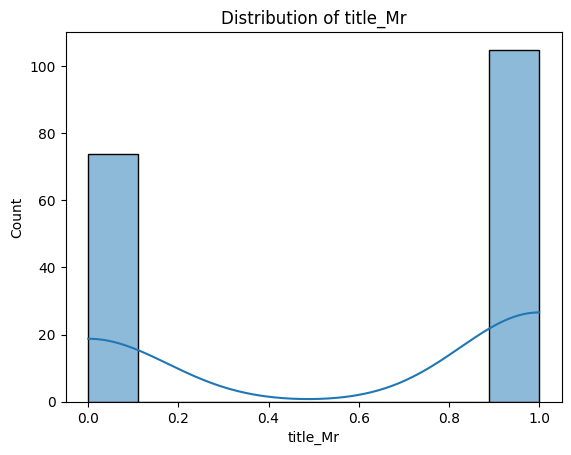

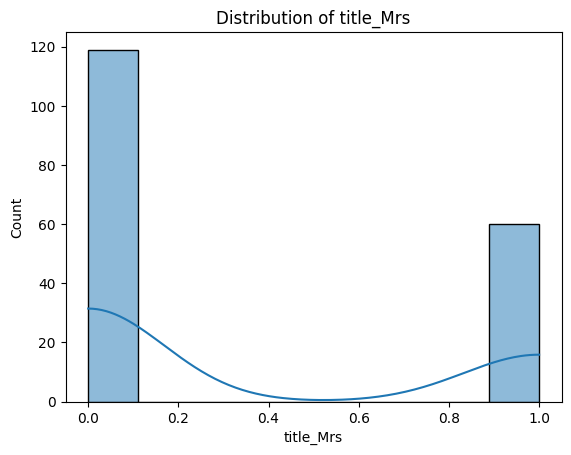

In [47]:
# prompt: code relevant graphs to gain more insight into the data analysis that has been performed

# Plot feature importances from the Random Forest model
importances = rf.feature_importances_
feature_names = X_train.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.show()

# Visualize SHAP values for the top features
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Create a dependence plot to visualize the relationship between a feature and the target variable
shap.dependence_plot("age", shap_values.values, X_test)

# Create a scatter plot showing the relationship between two features and the target variable
plt.figure(figsize=(8, 6))
sns.scatterplot(x="age", y="fare", hue="survived", data=pd.concat([X_test, y_test], axis=1))
plt.title("Relationship between Age, Fare, and Survival")
plt.show()


#  Distribution of features
for col in X_test.columns:
    plt.figure()
    sns.histplot(X_test[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

